In [5]:
import pandas as pd
from datetime import datetime
from datetime import timedelta

In [2]:
sess = pd.read_csv('session.csv')

In [13]:
sess['starthour'] = pd.to_datetime(sess['starttime']).apply(lambda x: x.hour)
sess['durationsec'] = pd.to_timedelta(sess['sessionlength']).apply(lambda x: x.seconds)

0            7
1            1
2            0
3          354
4          692
          ... 
3998040    655
3998041    171
3998042    108
3998043    282
3998044      8
Name: sessionlength, Length: 3998045, dtype: int64

In [3]:
sess

,user_id,sessionnum,getcreditinfo,useloanmanage,UsePrepayCalc,UseDSRCalc,CompleteIDCertification,starttime,endtime,sessionlength
0,1,1,True,False,False,False,False,2022-05-03 14:52:28,2022-05-03 14:52:35,0 days 00:00:07
1,1,2,True,True,False,False,False,2022-06-16 23:58:41,2022-06-16 23:58:42,0 days 00:00:01
2,7,1,True,False,False,False,False,2022-05-22 16:39:49,2022-05-22 16:39:49,0 days 00:00:00
3,9,1,True,False,False,False,False,2022-05-21 23:37:58,2022-05-21 23:43:52,0 days 00:05:54
4,11,1,True,True,True,False,True,2022-03-24 10:53:59,2022-03-24 11:05:31,0 days 00:11:32
...,...,...,...,...,...,...,...,...,...,...
3998040,879694,1,False,False,False,False,True,2022-03-31 20:07:23,2022-03-31 20:18:18,0 days 00:10:55
3998041,879695,1,False,False,False,False,True,2022-05-27 12:48:32,2022-05-27 12:51:23,0 days 00:02:51
3998042,879696,1,True,True,False,False,False,2022-03-14 05:35:34,2022-03-14 05:37:22,0 days 00:01:48
3998043,879696,2,False,False,False,False,True,2022-03-14 05:37:32,2022-03-14 05:42:14,0 days 00:04:42


In [ ]:
sess[['sessionnum','getcreditinfo','useloanmanage','UsePrepayCalc','UseDSRCalc','CompleteIDCertification','starthour','durationsec']]

In [15]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.3,min_samples=5)
predict = pd.DataFrame(model.fit_predict(sess[['sessionnum','getcreditinfo','useloanmanage','UsePrepayCalc','UseDSRCalc','CompleteIDCertification','starthour','durationsec']]))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([sess[['sessionnum','getcreditinfo','useloanmanage','UsePrepayCalc','UseDSRCalc','CompleteIDCertification','starthour','durationsec']],predict],axis=1)

r.groupby('predict').count()


,sessionnum,getcreditinfo,useloanmanage,UsePrepayCalc,UseDSRCalc,CompleteIDCertification,starthour,durationsec
predict,,,,,,,,
-1,1556228,1556228,1556228,1556228,1556228,1556228,1556228,1556228
0,78,78,78,78,78,78,78,78
1,10,10,10,10,10,10,10,10
2,5793,5793,5793,5793,5793,5793,5793,5793
3,59,59,59,59,59,59,59,59
...,...,...,...,...,...,...,...,...
111894,5,5,5,5,5,5,5,5
111895,5,5,5,5,5,5,5,5
111896,5,5,5,5,5,5,5,5


In [19]:
sns.pairplot(r,hue=int(str('predict'))+1)
plt.show()

ValueError: invalid literal for int() with base 10: 'predict'

In [21]:
r['predict'].drop_duplicates()

0               0
1               1
2               2
3              -1
6               3
            ...  
3219832    111894
3238952    111895
3244576    111896
3261509    111897
3322475    111898
Name: predict, Length: 111900, dtype: int64

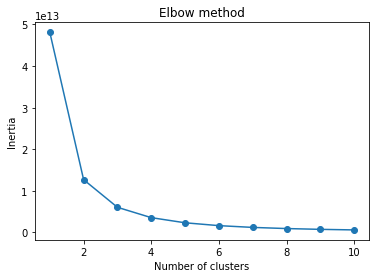

In [22]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(sess[['sessionnum','getcreditinfo','useloanmanage','UsePrepayCalc','UseDSRCalc','CompleteIDCertification','starthour','durationsec']])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(sess[['sessionnum','getcreditinfo','useloanmanage','UsePrepayCalc','UseDSRCalc','CompleteIDCertification','starthour','durationsec']])

KMeans(n_clusters=2)